UCD Data Analysis Project - Fintan M

This project aims to gather insights to the price of residential housing in Ireland and review who is most likely able to afford a purchase for this. The project with review readily available datasets from the Central Statistics Office of Ireland and the Residentital Property Price Register. 

This project will focus on two datasets

1. The Price of Houses sold in Ireland between the years of 2010 and 2023
2. The Average Weekly Earnings of Irish workers between the years of 2008 and 2022. 

We will import these datasets into our environment, clean them, manipulate and analyse them, to derive valuable insights into the cost of housing in Ireland

In [182]:
## Libraries Used ##

import pandas as pd 
import requests
import numpy as np
from scipy import stats
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# We will look at two datasets
# 1. the prices of houses sold between 2010 and 2022
# 2. the average earnings of Irish workers between 2010 and 2022. 


# The first data set we will review is a list of the prices of properties sold all over Ireland between 2010 and 2023. 

df1 = pd.read_csv('/Users/fintanmolloy/Desktop/UCD Data Analytics/UCD Data Analytics Course Project/PPR-All.csv', engine='python') 
# Sourced from  https://www.propertypriceregister.ie/Website/NPSRA/pprweb.nsf/page/ppr-home-en



In [183]:
# Data Snapshot

df1.head(5)

,Date of Sale (dd/mm/yyyy),Address,County,Eircode,Price in Euro,Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
0,01/01/2010,"5 Braemor Drive, Churchtown, Co.Dublin",Dublin,NaN,"343,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
1,03/01/2010,"134 Ashewood Walk, Summerhill Lane, Portlaoise",Laois,NaN,"185,000.00",No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...
2,04/01/2010,"1 Meadow Avenue, Dundrum, Dublin 14",Dublin,NaN,"438,500.00",No,No,Second-Hand Dwelling house /Apartment,NaN
3,04/01/2010,"1 The Haven, Mornington",Meath,NaN,"400,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
4,04/01/2010,"11 Melville Heights, Kilkenny",Kilkenny,NaN,"160,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN


In [184]:
# Data Snapshot
df1.tail(5)

,Date of Sale (dd/mm/yyyy),Address,County,Eircode,Price in Euro,Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
589019,16/03/2023,"NO 1 PRIORY HALL, BALLAGHADERREEN, CO ROSCOMMON",Roscommon,F45Y029,"135,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
589020,16/03/2023,"RAMPARK, JENKINSTOWN, DUNDALK",Louth,A91CD86,"305,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
589021,16/03/2023,"ROSSNAPARTEN, LOW ROAD SHROOVE, GREENCASTLE",Donegal,F93NVW5,"430,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
589022,16/03/2023,"THE CAPTAINS TABLE, MEIN, KNOCKNAGOSHEL",Kerry,NaN,"50,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
589023,16/03/2023,"TOSCANA, BALDWINSTOWN, WEXFORD",Wexford,Y35HH92,"325,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN


Text(0, 0.5, 'Number of Houses Sold')

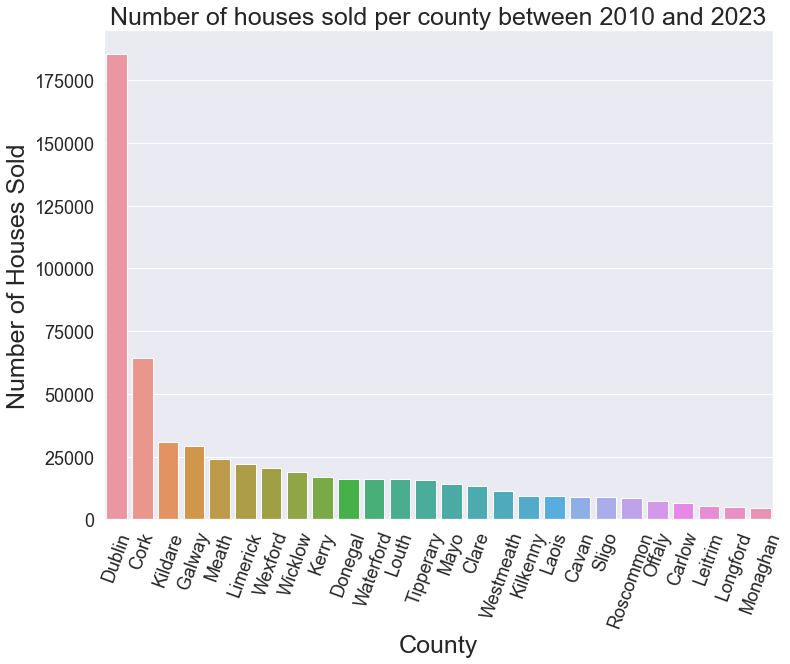

In [185]:
# From the tail function we can see that there is almost 600k houses sold across Ireland during this timeframe. 
# Create a vertical bar chart to count the number of sales per county. 

sns.set(style='darkgrid')
sns.set_color_codes("muted")
plt.figure(figsize=(12,9))

sns.countplot(data = df1, 
             x = 'County',
             order = df1['County'].value_counts().index)

plt.xticks(fontsize = 18, rotation = 70)
plt.yticks(fontsize = 18)
plt.title('Number of houses sold per county between 2010 and 2023', fontsize = 25)
plt.xlabel('County', fontsize = 25)
plt.ylabel('Number of Houses Sold', fontsize = 25)

This is expected as Dublin is the capital of Ireland, and is the most densely populated and built up county in the country. Nonetheless it is a valuable insight to show where the majoirty of residential property is sold across the country. 

Before we can start manipulating the data for exploration purposes we will need to clean up the dataset. 

In [186]:
# Establish the datatypes in df1 it is neccessary convert the data types in DF1 to manipulate them. 

DataTypes1 = df1.dtypes
print(DataTypes1)

Date of Sale (dd/mm/yyyy)    object
Address                      object
County                       object
Eircode                      object
Price in Euro                object
Not Full Market Price        object
VAT Exclusive                object
Description of Property      object
Property Size Description    object
dtype: object


In [187]:
# Price in Euro is considered an object and not a numeric datatype.
# This needs to be amended in order to calculate the average price of houses as part of the cleaning. 

# Remove the commas separating thousands allowing pd.to_numeric to work
df1['Price in Euro'] = df1['Price in Euro'].str.replace(',', '') 

# converts the object Price in Euro into a numeric dtype. 
df1['Price in Euro'] = pd.to_numeric(df1['Price in Euro']) 

#print the dype to check if the conversion worked. 
print(df1['Price in Euro'].dtype)


float64


In [188]:
# Date of Sale (dd/mm/yyyy) is also considered an object, and not a datetime datatype.
# This must be amended. 

# Remove the (dd/mm/yyyy) from the column name for Date of Sale. 
df1 = df1.rename(columns={'Date of Sale (dd/mm/yyyy)': 'Date of Sale'})

# Change the variable from df1 to something recognisable.
House_Prices = df1

# Convert the Date of Sale column to datetime dtype.
House_Prices['Date of Sale'] = pd.to_datetime(House_Prices['Date of Sale'])

# Filter the DF to only show Sale Prices from 2010 - 2022.
House_Prices = House_Prices[(House_Prices['Date of Sale'].dt.year >= 2010) & (House_Prices['Date of Sale'].dt.year <= 2022)]

# Check the DF to confirm if changes have taken effect. 
House_Prices.tail()

# Expect to see tail function now ends on 31/12/2022 instead of in 2023. 

,Date of Sale,Address,County,Eircode,Price in Euro,Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
580094,2022-12-30,"PEPPARDS LANE, RATHKEALE, CO. LIMERICK",Limerick,NaN,30000.00,No,No,Second-Hand Dwelling house /Apartment,NaN
580095,2022-12-31,"29 Castle Park, Killycard, Castleblayney",Monaghan,NaN,233480.17,No,Yes,New Dwelling house /Apartment,NaN
580096,2022-12-31,"8 SOUTH LOTTS ROAD, RINGSEND, DUBLIN 4",Dublin,D04WN77,287500.00,No,No,Second-Hand Dwelling house /Apartment,NaN
580097,2022-12-31,"83 Astor Lawn, Abbey Forte, Kinsale",Cork,P17FK50,311400.00,No,Yes,New Dwelling house /Apartment,NaN
580098,2022-12-31,"APT 22 - PEARSE COURT, PEARSE STREET, ATHLONE",Westmeath,N37AP62,120000.00,No,No,Second-Hand Dwelling house /Apartment,NaN


In [189]:
# Using pd.to_datetime to change the dtype has changed the format of the Date of Sale column to YYYY/MM/DD
# This is not an issue, we will use this as an opportunity to add a Year column.
House_Prices.loc[:, 'Year'] = House_Prices['Date of Sale'].dt.year
House_Prices.head()


/Users/fintanmolloy/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/Users/fintanmolloy/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,Date of Sale,Address,County,Eircode,Price in Euro,Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year
0,2010-01-01,"5 Braemor Drive, Churchtown, Co.Dublin",Dublin,NaN,343000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,2010
1,2010-03-01,"134 Ashewood Walk, Summerhill Lane, Portlaoise",Laois,NaN,185000.0,No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...,2010
2,2010-04-01,"1 Meadow Avenue, Dundrum, Dublin 14",Dublin,NaN,438500.0,No,No,Second-Hand Dwelling house /Apartment,NaN,2010
3,2010-04-01,"1 The Haven, Mornington",Meath,NaN,400000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,2010
4,2010-04-01,"11 Melville Heights, Kilkenny",Kilkenny,NaN,160000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,2010


In [190]:
# Group the table by the data we want to keep and calculate the average Price in Euro for each County for each year. 

Average_House_Prices_per_County_per_Year = House_Prices.groupby(['County', 
                                                                 'Year'])['Price in Euro'].mean().reset_index()

# .head() to ensure it worked
Average_House_Prices_per_County_per_Year.head(25)


,County,Year,Price in Euro
0,Carlow,2010,174220.631861
1,Carlow,2011,138192.954396
2,Carlow,2012,108485.957744
3,Carlow,2013,112456.492347
4,Carlow,2014,114349.247385
5,Carlow,2015,126740.739093
6,Carlow,2016,137853.813364
7,Carlow,2017,148324.812449
8,Carlow,2018,170782.390263
9,Carlow,2019,174866.722260


We now are left with a DF which contains County, Year of Sale and Average Price in Euro. The original DataFrame was 580098 rows of data, but by cleaning the data we have reduced this number down to 338 rows of data, from which we can pull more meaningful insight. 

The next step is to visualise the cost of houses in each county over the 12 year period

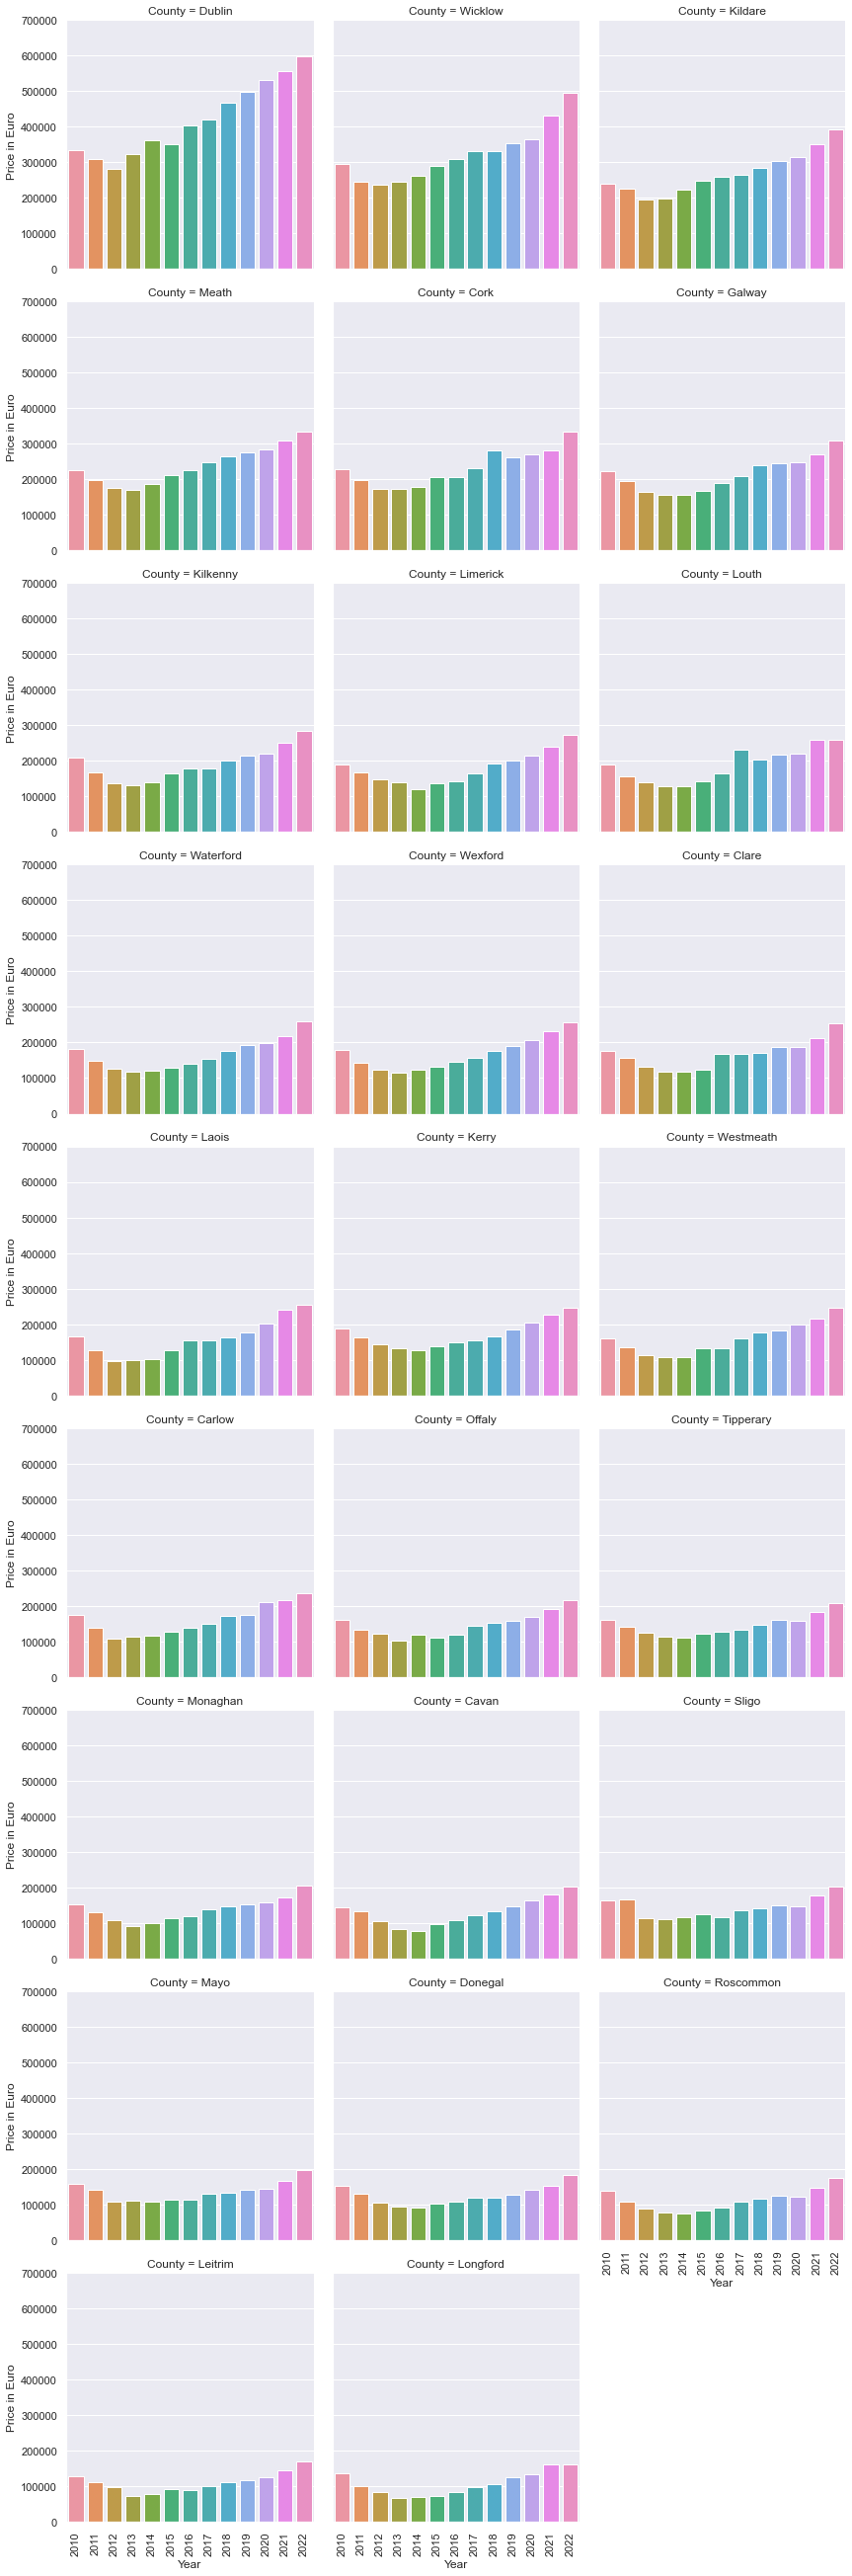

In [191]:
# Visualise this data using seaborn with a catplot

# Sort the data by Price in Euro in descending order.
sorted_Average_House_Price_Data = Average_House_Prices_per_County_per_Year.sort_values(by='Price in Euro',
                                                                                       ascending=False)

# Create the catplot
County_Prices_catplot = sns.catplot(data=sorted_Average_House_Price_Data,
                                    kind='bar', 
                                    col='County', 
                                    col_wrap=3, 
                                    x='Year', 
                                    y='Price in Euro',
                                    height=4
                                    )

# Additional rules to make chart clearer
County_Prices_catplot.set_xticklabels(rotation=90)
County_Prices_catplot.set(ylim=(0, 700000))



With these plots we can see that there appears to be a clear upwards trend in the price of residential properties being sold in Ireland over the last 12 years. The years surrounding 2012 appear to have a dip in the sale price, but from 2015 on there is a uniform increase in the sale price each year. 

Dublin has the most dramatic increase over this period, as seen below with average prices starting at 332k in 2010 and by the end of 2022 they were 599k.

In [192]:
# Review the average house prices in Dublin over this period
print(Average_House_Prices_per_County_per_Year[Average_House_Prices_per_County_per_Year['County'] == 'Dublin'])

    County  Year  Price in Euro
65  Dublin  2010  332941.893177
66  Dublin  2011  309209.065065
67  Dublin  2012  280460.947353
68  Dublin  2013  322691.849737
69  Dublin  2014  362146.394989
70  Dublin  2015  350929.990367
71  Dublin  2016  404609.022704
72  Dublin  2017  419657.157364
73  Dublin  2018  468795.809089
74  Dublin  2019  498524.659487
75  Dublin  2020  530471.482581
76  Dublin  2021  555479.999399
77  Dublin  2022  599244.625603


We can see that there is a dramatic increase in Dublin particularly, understanding the % increase for Dublin and every other county would give us a better sense of how much it has changed over the time period we are analyising


In [193]:
# Calculate the overall % increase for each County from 2010 to 2022. 

# Filter the data to include only the years 2010 and 2022.
House_Prices_Filtered = House_Prices[House_Prices['Year'].isin([2010, 2022])]

# Create a pivot table with the relevant columns and calculate the mean. 
# Year variable will only pull 2010 and 2022 as DF is filterted to only contain these years.
pivot_table1 = pd.pivot_table(House_Prices_Filtered, values='Price in Euro',
                             index='County', columns='Year', 
                             aggfunc=[np.mean], fill_value=0) 
# Found a guide to using pivot tables in pandas on https://pbpython.com/pandas-pivot-table-explained.html

# Rename columns to show average sale price for each year. 
pivot_table1.columns = ['Avg Sale Price in Euro in 2010', 'Avg Sale Price in Euro 2022']

# Calculate the percentage change between 2010 and 2022.
pivot_table1['Overall % Change in House Sale Price'] = (pivot_table1['Avg Sale Price in Euro 2022'] - pivot_table1['Avg Sale Price in Euro in 2010']) / pivot_table1['Avg Sale Price in Euro in 2010'] * 100

# Reset the index to make the County column a regular column.
House_Price_Percentage_Change = pivot_table1.reset_index()

# Round the figures to the nearest whole number
House_Price_Percentage_Change.loc[:, ['Avg Sale Price in Euro in 2010', 'Avg Sale Price in Euro 2022', 'Overall % Change in House Sale Price']] = House_Price_Percentage_Change.loc[:, ['Avg Sale Price in Euro in 2010', 'Avg Sale Price in Euro 2022', 'Overall % Change in House Sale Price']].round(decimals = 0)


# Check result
House_Price_Percentage_Change.head(25)



,County,Avg Sale Price in Euro in 2010,Avg Sale Price in Euro 2022,Overall % Change in House Sale Price
0,Carlow,174221.0,235348.0,35.0
1,Cavan,142471.0,202309.0,42.0
2,Clare,175999.0,255190.0,45.0
3,Cork,230044.0,333625.0,45.0
4,Donegal,151829.0,183690.0,21.0
5,Dublin,332942.0,599245.0,80.0
6,Galway,223014.0,308575.0,38.0
7,Kerry,188045.0,247124.0,31.0
8,Kildare,240094.0,391494.0,63.0
9,Kilkenny,209911.0,284956.0,36.0


This table breaksdown the overall change in the price of houses sold in Ireland between 2010 and 2022, it is clear that there has been a dramatic increase in some areas, and more measured in others. However there is 26 counties represented in this table making it cluttered. We can use seaborn to visualise the results of our analysis so far to show case the range of sale prices in Ireland 

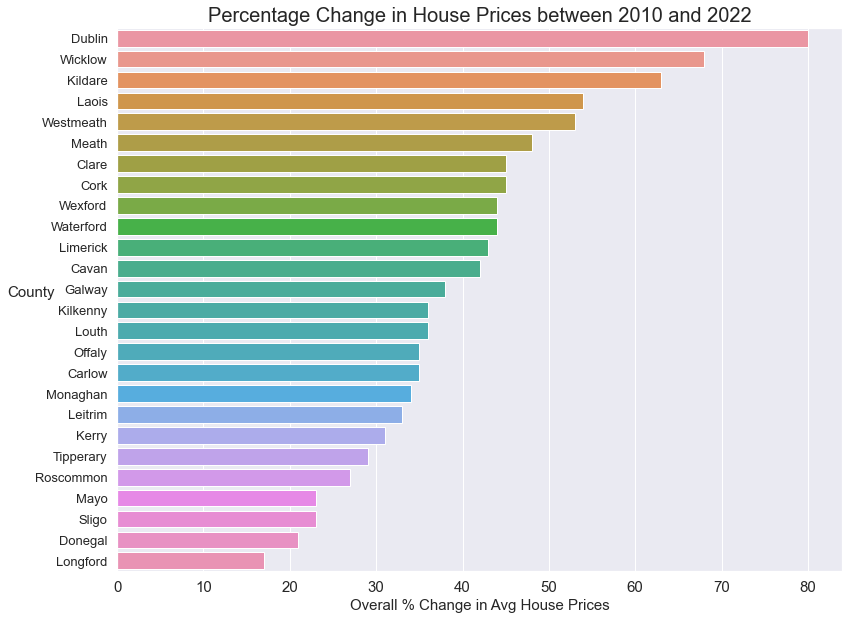

In [194]:
# Create a chart to show the percentage change in house sale prices between 2010 and 2022. 

# Sort the percentage change data as descending  
Chart_Data_House_Price_Percentage_Change = House_Price_Percentage_Change.sort_values(by='Overall % Change in House Sale Price', ascending=False)

# Create a horizontal bar chart to showcase the differences between counties. 
sns.set(style='darkgrid')
sns.set_color_codes("muted")
plt.figure(figsize=(13,10))
sns.barplot(x='Overall % Change in House Sale Price',
            y='County', 
            data=Chart_Data_House_Price_Percentage_Change, 
            orient='horizontal'
           ).set_title('Percentage Change in House Prices between 2010 and 2022', fontdict={'size': 20})
plt.xticks(size = 15)
plt.yticks(size = 13)
plt.xlabel('Overall % Change in Avg House Prices', fontdict={'size': 15})
plt.ylabel('County', fontdict={'size': 15}, rotation = 'horizontal')
plt.show()


This bar chart provides insight into the range of increasing residential price values across Ireland. 

1. Based on the dataset from the Property Price Registry we can definitively state that there has been a consistent increase in the sale price of homes in Ireland - while there was a decrease in prices in and around 2012 the overall trend has shown a dramatic increase in sale prices between 2010 and 2022. 

2. The increase appears to be focused in specific areas like Dublin, Wicklow, and Kildare. From our previous graph (the catplot) we also established the majority of residential property sales is in Dublin, Wicklow, and Kildare. We can therefore state that the counties where the most homes are sold, are also the most expensive places to buy homes in Ireland. 

The next question we want to ask is if there has been a similar or proportional trend in earnings over this period, or whether the cost of housing has outstripped the earning potential of Irish workers.

In [195]:
## The second set of data we will review is the average weekly earnings of workers in Ireland which was downloaded from the CSO website. 
# https://ws.cso.ie/public/api.jsonrpc?data=%7B%22jsonrpc%22:%222.0%22,%22method%22:%22PxStat.Data.Cube_API.ReadDataset%22,%22params%22:%7B%22class%22:%22query%22,%22id%22:%5B%22STATISTIC%22%5D,%22dimension%22:%7B%22STATISTIC%22:%7B%22category%22:%7B%22index%22:%5B%22EHQ03C02%22%5D%7D%7D%7D,%22extension%22:%7B%22pivot%22:null,%22codes%22:false,%22language%22:%7B%22code%22:%22en%22%7D,%22format%22:%7B%22type%22:%22CSV%22,%22version%22:%221.0%22%7D,%22matrix%22:%22EHQ03%22%7D,%22version%22:%222.0%22%7D%7D
# https://data.cso.ie/table/EHQ03
df2 = pd.read_csv("/Users/fintanmolloy/Desktop/UCD Data Analytics/UCD Data Analytics Course Project/EHQ03.20230401T130414ALLVALUES.csv", engine='python') 

In [196]:
# Data snapshot
df2.head()

,Statistic Label,Quarter,Economic Sector NACE Rev 2,Type of Employee,UNIT,VALUE
0,Average Weekly Earnings,2008Q1,All NACE economic sectors,All employees,Euro,704.60
1,Average Weekly Earnings,2008Q1,All NACE economic sectors,"Managers, professionals and associated profess...",Euro,1115.99
2,Average Weekly Earnings,2008Q1,All NACE economic sectors,"Clerical, sales and service employees",Euro,497.47
3,Average Weekly Earnings,2008Q1,All NACE economic sectors,"Production, transport, craft and other manual ...",Euro,547.28
4,Average Weekly Earnings,2008Q1,Mining and quarrying (B),All employees,Euro,907.92


In [197]:
# Data Snapshot 
df2.tail()

,Statistic Label,Quarter,Economic Sector NACE Rev 2,Type of Employee,UNIT,VALUE
5035,Average Weekly Earnings,2022Q4,"Financial, insurance and real estate activitie...","Production, transport, craft and other manual ...",Euro,NaN
5036,Average Weekly Earnings,2022Q4,"Arts, entertainment, recreation and other serv...",All employees,Euro,582.36
5037,Average Weekly Earnings,2022Q4,"Arts, entertainment, recreation and other serv...","Managers, professionals and associated profess...",Euro,NaN
5038,Average Weekly Earnings,2022Q4,"Arts, entertainment, recreation and other serv...","Clerical, sales and service employees",Euro,NaN
5039,Average Weekly Earnings,2022Q4,"Arts, entertainment, recreation and other serv...","Production, transport, craft and other manual ...",Euro,NaN


At a glance of this dataset we can establish the following:

1. The quarter column is not in a workable format currently; Q4 may not be interpreted as a date by pandas so we will need to adapt this to reflect the actual dates better. 
2. The VALUE column is missing values on the tail() function, we will need to explore this and determine how much values are missing and how this may impact the project going forward. 
3. This data is a deep drill down into average wages by week, by quarter, per year. Going on a weekly basis would create too much data points for the purpsoe of this project.

In [198]:
# Convert the Quarter column to a Yearly Column

# Create a new column called Year, remove the Q and replace with a '-'
df2['Year'] = df2['Quarter'].str.replace('Q', '-')

# Check to see output
df2.head()



,Statistic Label,Quarter,Economic Sector NACE Rev 2,Type of Employee,UNIT,VALUE,Year
0,Average Weekly Earnings,2008Q1,All NACE economic sectors,All employees,Euro,704.60,2008-1
1,Average Weekly Earnings,2008Q1,All NACE economic sectors,"Managers, professionals and associated profess...",Euro,1115.99,2008-1
2,Average Weekly Earnings,2008Q1,All NACE economic sectors,"Clerical, sales and service employees",Euro,497.47,2008-1
3,Average Weekly Earnings,2008Q1,All NACE economic sectors,"Production, transport, craft and other manual ...",Euro,547.28,2008-1
4,Average Weekly Earnings,2008Q1,Mining and quarrying (B),All employees,Euro,907.92,2008-1


In [199]:
# The Year column's values resemble January 2008 but is still an object datatype
print(df2['Year'].dtypes)

object


In [200]:
# Convert the Year column into a datetime data type, or something that can be used as such. 
df2['Year'] = pd.to_datetime(df2['Year'])
df2['Year'] = pd.DatetimeIndex(df2['Year']).year
print(df2['Year'].dtypes)

int64


In [201]:
# Check output
df2.head()

,Statistic Label,Quarter,Economic Sector NACE Rev 2,Type of Employee,UNIT,VALUE,Year
0,Average Weekly Earnings,2008Q1,All NACE economic sectors,All employees,Euro,704.60,2008
1,Average Weekly Earnings,2008Q1,All NACE economic sectors,"Managers, professionals and associated profess...",Euro,1115.99,2008
2,Average Weekly Earnings,2008Q1,All NACE economic sectors,"Clerical, sales and service employees",Euro,497.47,2008
3,Average Weekly Earnings,2008Q1,All NACE economic sectors,"Production, transport, craft and other manual ...",Euro,547.28,2008
4,Average Weekly Earnings,2008Q1,Mining and quarrying (B),All employees,Euro,907.92,2008


In [202]:
df2.tail()

,Statistic Label,Quarter,Economic Sector NACE Rev 2,Type of Employee,UNIT,VALUE,Year
5035,Average Weekly Earnings,2022Q4,"Financial, insurance and real estate activitie...","Production, transport, craft and other manual ...",Euro,NaN,2022
5036,Average Weekly Earnings,2022Q4,"Arts, entertainment, recreation and other serv...",All employees,Euro,582.36,2022
5037,Average Weekly Earnings,2022Q4,"Arts, entertainment, recreation and other serv...","Managers, professionals and associated profess...",Euro,NaN,2022
5038,Average Weekly Earnings,2022Q4,"Arts, entertainment, recreation and other serv...","Clerical, sales and service employees",Euro,NaN,2022
5039,Average Weekly Earnings,2022Q4,"Arts, entertainment, recreation and other serv...","Production, transport, craft and other manual ...",Euro,NaN,2022


Lets review the available data in DF2.

At a glance of the data snapshot from the tail function we can see that the dataset is missing values under the VALUE column. the tail() function does not give us much insight into how much of these values are missing. 

We could use value.counts() to determine this, but we can also visualise it to get a picture of how much data is missing. 

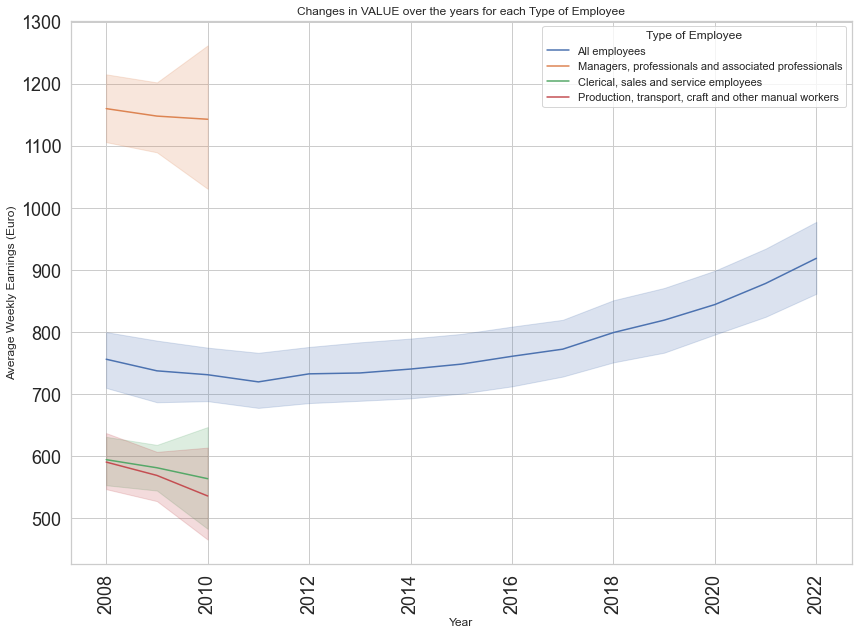

In [203]:
# Previously noted in the .tail() data snapshot of df2 it was observed that there is multiple NaN values under the VALUE column
# Create a line graph to represent these values

# plt design

sns.set(style='whitegrid')
sns.set_color_codes("muted")
plt.figure(figsize=(14,10))
sns.lineplot(data=df2,
             x='Year',
             y='VALUE', 
             hue='Type of Employee')
plt.title('Changes in VALUE over the years for each Type of Employee')
plt.xlabel('Year')
plt.xticks(fontsize = 18, rotation = 90)
plt.yticks(fontsize = 18)
plt.ylabel('Average Weekly Earnings (Euro)')
plt.show()

We can see from this data set that the information for everyone except ALL EMPLOYEES ceased to be collected after 2009.

It will therefore be prudent to focus our analysis on only the complete dataset for ALL EMPLOYEES, and remove references to any other form of employee. 

We have established that this is an incomplete dataset, we will remove the incomplete data using .loc function to return rows which only contain ALL EMPLOYEES with a boolean isin function.

In [204]:
# Create a DF that only contains ALL EMPLOYEES

# List of Data to keep
complete_data = ['All employees'] 

# Creates a new DF which only contains rows where All Employees = True. 
df2_cleaned = df2.loc[df2['Type of Employee'].isin(complete_data)] 

# Reset the index, as 3 of every 4 entries has been removed.
df2_cleaned.reset_index()

,index,Statistic Label,Quarter,Economic Sector NACE Rev 2,Type of Employee,UNIT,VALUE,Year
0,0,Average Weekly Earnings,2008Q1,All NACE economic sectors,All employees,Euro,704.60,2008
1,4,Average Weekly Earnings,2008Q1,Mining and quarrying (B),All employees,Euro,907.92,2008
2,8,Average Weekly Earnings,2008Q1,Manufacturing (C),All employees,Euro,772.80,2008
3,12,Average Weekly Earnings,2008Q1,Construction (F),All employees,Euro,721.56,2008
4,16,Average Weekly Earnings,2008Q1,Wholesale and retail trade; repair of motor ve...,All employees,Euro,507.10,2008
...,...,...,...,...,...,...,...,...
1255,5020,Average Weekly Earnings,2022Q4,Other service activities (S),All employees,Euro,542.02,2022
1256,5024,Average Weekly Earnings,2022Q4,Industry (B to E),All employees,Euro,1008.52,2022
1257,5028,Average Weekly Earnings,2022Q4,"Electricity, water supply and waste management...",All employees,Euro,1215.74,2022
1258,5032,Average Weekly Earnings,2022Q4,"Financial, insurance and real estate activitie...",All employees,Euro,1256.31,2022


This leaves DF2 with only the income values for all employees across all sectors for each quarter. If we make the same graph again we will plot just the values for All Employees. 

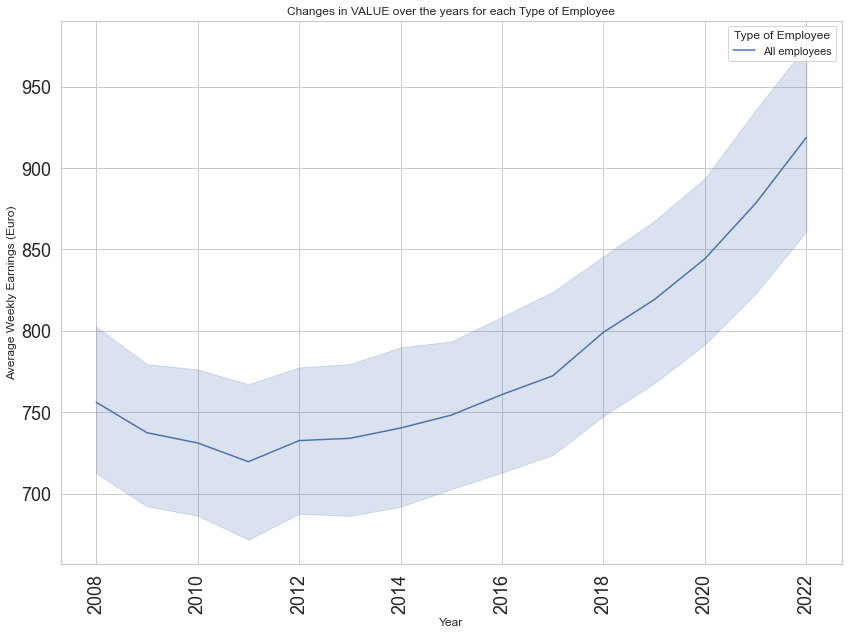

In [205]:
# Create the line graph again, it will only include ALL EMPLOYEES

sns.set(style='whitegrid')
sns.set_color_codes("muted")
plt.figure(figsize=(14,10))
sns.lineplot(data=df2_cleaned, 
             x='Year', 
             y='VALUE', 
             hue='Type of Employee')
plt.title('Changes in VALUE over the years for each Type of Employee')
plt.xlabel('Year')
plt.xticks(fontsize = 18, rotation = 90)
plt.yticks(fontsize = 18)
plt.ylabel('Average Weekly Earnings (Euro)')
plt.show()

Thus far we have cleaned the dataframe so that it now focuses only on ALL EMPLOYEES, however there is a column called Economic Sector NACE Rev 2 which lists all the Economic Sectors people work in within Ireland.

In addition to this as can be seen in the graph the dataframe contains the average weekly earnings, per quarter, per year for All Employees in each sector. 

In [206]:
print(df2_cleaned['Economic Sector NACE Rev 2'].unique())

['All NACE economic sectors' 'Mining and quarrying (B)'
 'Manufacturing (C)' 'Construction (F)'
 'Wholesale and retail trade; repair of motor vehicles and motorcycles (G)'
 'Transportation and storage (H)'
 'Accommodation and food service activities (I)'
 'Information and communication (J)'
 'Financial and insurance activities (K)' 'Real estate activities (L)'
 'Professional, scientific and technical activities (M)'
 'Administrative and support service activities (N)'
 'Public administration and defence; compulsory social security (O)'
 'Education (P)' 'Human health and social work activities (Q)'
 'Arts, entertainment and recreation (R)' 'Other service activities (S)'
 'Industry (B to E)'
 'Electricity, water supply and waste management (D,E)'
 'Financial, insurance and real estate activities (K,L)'
 'Arts, entertainment, recreation and other service activities (R,S)']


Each sector has its own Weekly Earnings, per Quarter, per Year, the below line chart will indicate how this is messy data that needs to be cleaned further before insights can be derived

It is also clear that some sectors are actually consolidated from two sectors. These are skewing results and will need to be removed. 


In [219]:
# Make a list of sectors that are to be removed.
kept_sectors = ['All NACE economic sectors',
                'Mining and quarrying (B)',
                'Manufacturing (C)' 'Construction (F)',
                'Wholesale and retail trade; repair of motor vehicles and motorcycles (G)',
                'Transportation and storage (H)',
                'Accommodation and food service activities (I)',
                'Information and communication (J)',
                'Financial and insurance activities (K)',
                'Real estate activities (L)',
                'Professional, scientific and technical activities (M)',
                'Administrative and support service activities (N)',
                'Public administration and defence; compulsory social security (O)',
                'Education (P)',
                'Human health and social work activities (Q)'
                'Arts, entertainment and recreation (R)',
                'Other service activities (S)']

# Filter to remove these sectors from the df. 
df2_cleaned_filtered = df2_cleaned[df2_cleaned['Economic Sector NACE Rev 2'].isin(kept_sectors)]

df2_cleaned_filtered.head(20)


,Statistic Label,Quarter,Economic Sector NACE Rev 2,Type of Employee,UNIT,VALUE,Year
0,Average Weekly Earnings,2008Q1,All NACE economic sectors,All employees,Euro,704.60,2008
4,Average Weekly Earnings,2008Q1,Mining and quarrying (B),All employees,Euro,907.92,2008
16,Average Weekly Earnings,2008Q1,Wholesale and retail trade; repair of motor ve...,All employees,Euro,507.10,2008
20,Average Weekly Earnings,2008Q1,Transportation and storage (H),All employees,Euro,751.88,2008
24,Average Weekly Earnings,2008Q1,Accommodation and food service activities (I),All employees,Euro,347.53,2008
28,Average Weekly Earnings,2008Q1,Information and communication (J),All employees,Euro,998.02,2008
32,Average Weekly Earnings,2008Q1,Financial and insurance activities (K),All employees,Euro,1168.67,2008
36,Average Weekly Earnings,2008Q1,Real estate activities (L),All employees,Euro,763.72,2008
40,Average Weekly Earnings,2008Q1,"Professional, scientific and technical activit...",All employees,Euro,811.60,2008
44,Average Weekly Earnings,2008Q1,Administrative and support service activities (N),All employees,Euro,508.04,2008


Even after removing some of the sectors that are "doubled up" there is too much to visualise effectively. We can attempt to showcase the average wages per week, per quarter, per year for each sector as an example

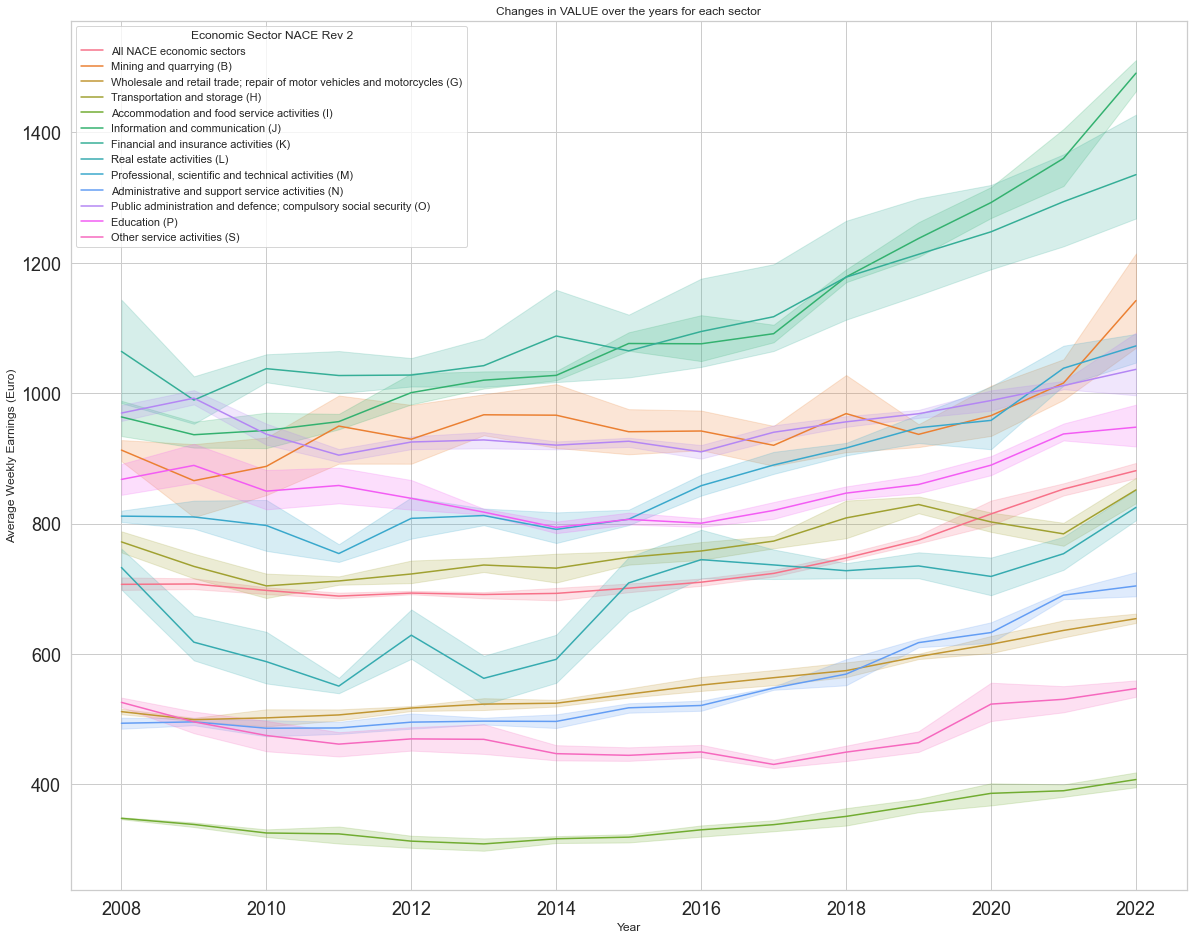

In [220]:
# Line chart of All Economic Sectors changes in Earnings for ALL EMPLOYEES
sns.set(style='whitegrid')
plt.figure(figsize=(20,16))
sns.lineplot(data=df2_cleaned_filtered, 
             x='Year', 
             y='VALUE', 
             hue='Economic Sector NACE Rev 2')
plt.title('Changes in VALUE over the years for each sector')
plt.xlabel('Year')
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.ylabel('Average Weekly Earnings (Euro)')
plt.show()

# The caveat to to this line chart is that there is just too much data to be legible. 

There is too much Economic sectors to make a legiible line chart, and using average weekly earnings, per quarter, per year is not the most efficient way of assessing this data.

This data can be cleaned up to show the Average Yearly Earnings for each Economic Sector

In [221]:
# To do this we need to multiply the average weekly earnings for each sector by 13, 13 weeks to each quarter in a year.

df2_cleaned_filtered['Quarterly Earnings'] = df2_cleaned_filtered['VALUE'] * 13
df2_cleaned_filtered.head(15)

<ipython-input-221-6f45afbdb08c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_cleaned_filtered['Quarterly Earnings'] = df2_cleaned_filtered['VALUE'] * 13


,Statistic Label,Quarter,Economic Sector NACE Rev 2,Type of Employee,UNIT,VALUE,Year,Quarterly Earnings
0,Average Weekly Earnings,2008Q1,All NACE economic sectors,All employees,Euro,704.60,2008,9159.80
4,Average Weekly Earnings,2008Q1,Mining and quarrying (B),All employees,Euro,907.92,2008,11802.96
16,Average Weekly Earnings,2008Q1,Wholesale and retail trade; repair of motor ve...,All employees,Euro,507.10,2008,6592.30
20,Average Weekly Earnings,2008Q1,Transportation and storage (H),All employees,Euro,751.88,2008,9774.44
24,Average Weekly Earnings,2008Q1,Accommodation and food service activities (I),All employees,Euro,347.53,2008,4517.89
28,Average Weekly Earnings,2008Q1,Information and communication (J),All employees,Euro,998.02,2008,12974.26
32,Average Weekly Earnings,2008Q1,Financial and insurance activities (K),All employees,Euro,1168.67,2008,15192.71
36,Average Weekly Earnings,2008Q1,Real estate activities (L),All employees,Euro,763.72,2008,9928.36
40,Average Weekly Earnings,2008Q1,"Professional, scientific and technical activit...",All employees,Euro,811.60,2008,10550.80
44,Average Weekly Earnings,2008Q1,Administrative and support service activities (N),All employees,Euro,508.04,2008,6604.52


In [222]:
# Group by to remove irrelevant info
df2_grouped = df2_cleaned_filtered.groupby(['Year', 'Economic Sector NACE Rev 2', 'UNIT']) 

# Sum up all the quarterly figures for each year to get the yearly income
df2_summed = df2_grouped['Quarterly Earnings'].sum() 

# Rename the DF and reset the index
avg_yearly_earnings = df2_summed.reset_index() 

In [223]:
#Rename the column to be accurate
avg_yearly_earnings = avg_yearly_earnings.rename(columns={'Quarterly Earnings': 'Yearly Earnings'}) 

# Check the output
avg_yearly_earnings.head()

,Year,Economic Sector NACE Rev 2,UNIT,Yearly Earnings
0,2008,Accommodation and food service activities (I),Euro,18100.55
1,2008,Administrative and support service activities (N),Euro,25683.97
2,2008,All NACE economic sectors,Euro,36762.44
3,2008,Education (P),Euro,45131.06
4,2008,Financial and insurance activities (K),Euro,55340.87


This data has been cleaned up significantly. The data initially represented the weekly average earning, per quarter, per year, it has now been adapted to show the yearly earnings of employees for each year. This has consolidated the datapoints and will make it easier to work with. 

That said, the project aims to analyise the years between 2010 and 2022, this earnings dataset actually covers 2008 - 2022. In order to make sure the data set covers the same period as the project we will need to remove some years.

In [224]:
# Boolean indexing to select only the rows equal to or greater than 2010. 
avg_yearly_earnings_2010_to_2022 = avg_yearly_earnings[avg_yearly_earnings["Year"]>=2010]

# Reset index as removed starting values
avg_yearly_earnings_2010_to_2022.reset_index()

# The output should show that we only include years following 2010. 


,index,Year,Economic Sector NACE Rev 2,UNIT,Yearly Earnings
0,26,2010,Accommodation and food service activities (I),Euro,16931.07
1,27,2010,Administrative and support service activities (N),Euro,25286.43
2,28,2010,All NACE economic sectors,Euro,36277.28
3,29,2010,Education (P),Euro,44196.49
4,30,2010,Financial and insurance activities (K),Euro,53964.30
...,...,...,...,...,...
164,190,2022,"Professional, scientific and technical activit...",Euro,55777.28
165,191,2022,Public administration and defence; compulsory ...,Euro,53908.01
166,192,2022,Real estate activities (L),Euro,42898.18
167,193,2022,Transportation and storage (H),Euro,44293.60


In [225]:
# Review the average earnings in across all sectors over this period
print(avg_yearly_earnings_2010_to_2022[avg_yearly_earnings_2010_to_2022['Economic Sector NACE Rev 2'] == 'All NACE economic sectors'])

     Year Economic Sector NACE Rev 2  UNIT  Yearly Earnings
28   2010  All NACE economic sectors  Euro         36277.28
41   2011  All NACE economic sectors  Euro         35825.27
54   2012  All NACE economic sectors  Euro         36065.90
67   2013  All NACE economic sectors  Euro         35953.84
80   2014  All NACE economic sectors  Euro         36041.20
93   2015  All NACE economic sectors  Euro         36456.55
106  2016  All NACE economic sectors  Euro         36934.04
119  2017  All NACE economic sectors  Euro         37635.65
132  2018  All NACE economic sectors  Euro         38867.53
145  2019  All NACE economic sectors  Euro         40283.10
158  2020  All NACE economic sectors  Euro         42379.48
171  2021  All NACE economic sectors  Euro         44360.03
184  2022  All NACE economic sectors  Euro         45826.95


In [226]:
# Lets calculate the Overall % Change in Earnings between 2010 and 2022 for each economic sector.

# Filter the data to include only the years 2010 and 2022.
Yearly_Earnings_Filtered = avg_yearly_earnings[avg_yearly_earnings['Year'].isin([2010, 2022])] 

# Create a pivot table with the relevant columns and calculate the mean. 
pivot_table2 = pd.pivot_table(Yearly_Earnings_Filtered, 
                              values ='Yearly Earnings',
                             index = 'Economic Sector NACE Rev 2',
                             columns = 'Year',
                             aggfunc=[np.mean],
                             fill_value=0)

# Rename columns to show average earnings per year. 
pivot_table2.columns = ['Avg Yearly Earnings in Euro 2010', 'Avg Yearly Earnings in Euro 2022']

# Calculate percentage change
pivot_table2['Overall % Change Avg Yearly Earnings'] = (pivot_table2['Avg Yearly Earnings in Euro 2022'] - pivot_table2['Avg Yearly Earnings in Euro 2010']) / pivot_table2['Avg Yearly Earnings in Euro 2010'] * 100

# Reset the index to make the Economic Sector NACE Rev 2 column a regular column
Avg_Yearly_Earnings_Percentage_Change = pivot_table2.reset_index()

# Round the figures to the nearest whole number
Avg_Yearly_Earnings_Percentage_Change.loc[:, ['Avg Yearly Earnings in Euro 2010', 'Avg Yearly Earnings in Euro 2022', 'Overall % Change Avg Yearly Earnings']] = Avg_Yearly_Earnings_Percentage_Change.loc[:, ['Avg Yearly Earnings in Euro 2010', 'Avg Yearly Earnings in Euro 2022', 'Overall % Change Avg Yearly Earnings']].round(decimals = 0)


# Print the result
Avg_Yearly_Earnings_Percentage_Change.head(25)


,Economic Sector NACE Rev 2,Avg Yearly Earnings in Euro 2010,Avg Yearly Earnings in Euro 2022,Overall % Change Avg Yearly Earnings
0,Accommodation and food service activities (I),16931.0,21194.0,25.0
1,Administrative and support service activities (N),25286.0,36634.0,45.0
2,All NACE economic sectors,36277.0,45827.0,26.0
3,Education (P),44196.0,49297.0,12.0
4,Financial and insurance activities (K),53964.0,69438.0,29.0
5,Information and communication (J),49039.0,77533.0,58.0
6,Mining and quarrying (B),46172.0,59393.0,29.0
7,Other service activities (S),24708.0,28448.0,15.0
8,"Professional, scientific and technical activit...",41456.0,55777.0,35.0
9,Public administration and defence; compulsory ...,48735.0,53908.0,11.0


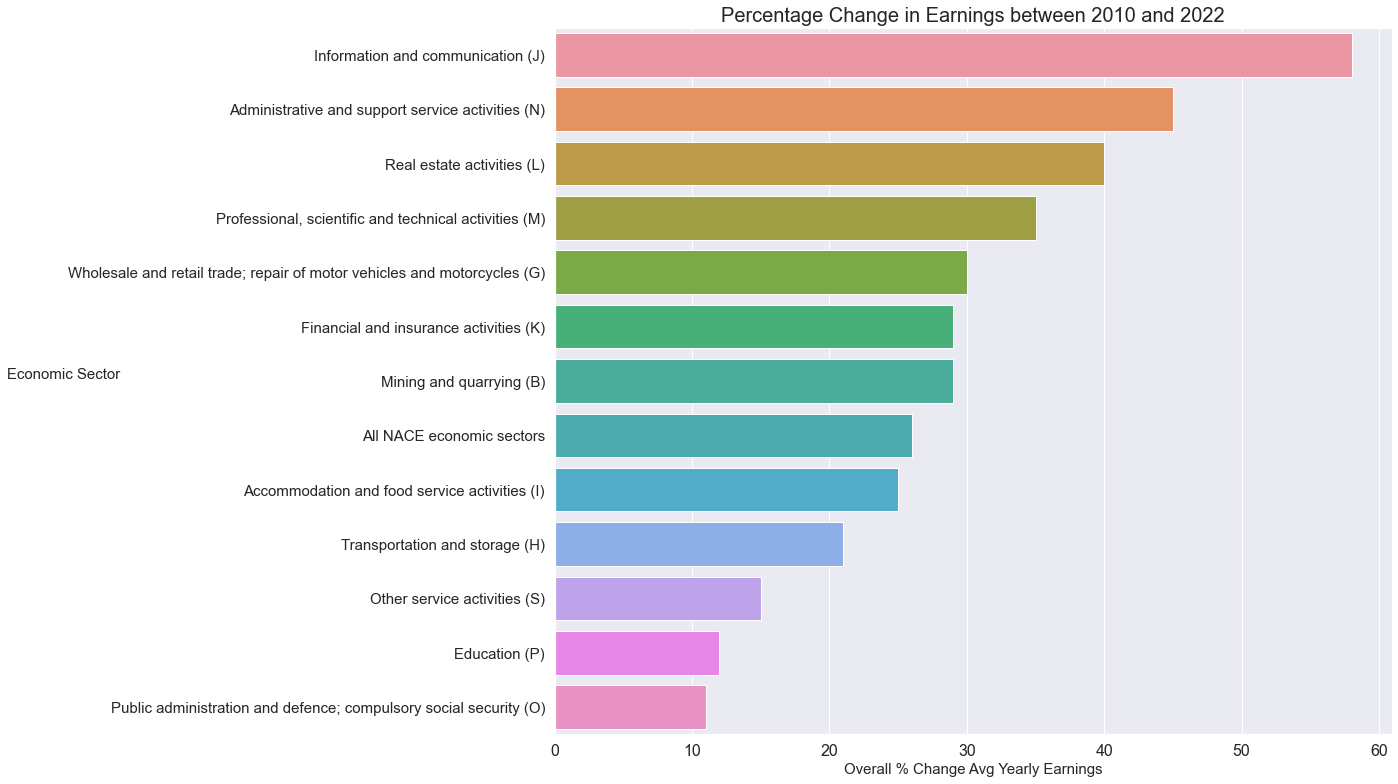

In [227]:
# We will create a horizontal bar chart to visualise the overall percentage changes in earnings between 2010 and 2022. 

# Sort the percentage change data as descending  
Avg_Yearly_Earnings_Percentage_Change = Avg_Yearly_Earnings_Percentage_Change.sort_values(by='Overall % Change Avg Yearly Earnings', ascending=False)

# Create a horizontal bar chart to showcase the differences between Economic Sectors. 
sns.set(style='darkgrid')
sns.set_color_codes("muted")
plt.figure(figsize=(15,13))
sns.barplot(x='Overall % Change Avg Yearly Earnings', 
            y='Economic Sector NACE Rev 2', 
            data=Avg_Yearly_Earnings_Percentage_Change, 
            orient='horizontal',
            ).set_title('Percentage Change in Earnings between 2010 and 2022', fontdict={'size': 20})

plt.xticks(size = 16)
plt.yticks(size = 15)
plt.xlabel('Overall % Change Avg Yearly Earnings', fontdict={'size': 15})
plt.ylabel('Economic Sector', fontdict={'size': 15}, rotation = 'horizontal')
plt.show()

From this bar chart we can easily visualise where the greatest changes in earnings have occurred for the average employee in each sector. 

The caveat to this is that it is by no means an exhaustative breakdown of yearly earnings; the numbers are based on ALL EMPLOYEES instead of:
Managers, professionals and associated professionals
Clerical, sales and service employees
Production, transport, craft and other manual workers

This is due to having no information for these three breakdowns past 2009, this is outside of the analysis timeframe of 2010 - 2022, and furthermore with such an incomplete dataset it would not be able to contribute much.

From the visualisation it is clear that the top three economic sectors with the highest increase in earnings are 
1. Information and Communication
2. Administrative and Support Service Activities
3. Reali Estate Activities

We've also established the most expensive cunties to buy a house are 

1. Dublin
2. Wicklow
3. Kildare

We can now look to see the how we can merge the two dataframes used in this project for our final analysis. 

This final analysis will be conducted on samples from both dataframes. 

Dublin for example is proven to be the most popular place to buy houses in Ireland; it is also the most expensive and has had the greatest increase in sale price. 

Wages as a whole have also increased across each sector in Ireland, some sectors more than others, but the question that spurred this project was whether the changes in wages in Ireland have kept pace with the changes in House value, or if one has completely exceeded the other. 

We can assess this by comparing the two datasets, and the results with idealy answer this question.

In [251]:
# Filter the datasets to include only the relevant data

# Pull the specific sectors earnings between 2010 and 2022 to be analyised against Dublin house prices
avg_yearly_earnings_filtered_sample1 = avg_yearly_earnings_2010_to_2022[avg_yearly_earnings_2010_to_2022['Economic Sector NACE Rev 2'].isin(['Information and communication (J)', 'Financial and insurance activities (K)', 'Accommodation and food service activities (I)' ,'All NACE economic sectors', 'Education (P)',  'Professional, scientific and technical activities (M)'])]

# Pull Dublin house prices over 2010 - 2022
average_house_prices_dublin = Average_House_Prices_per_County_per_Year[Average_House_Prices_per_County_per_Year['County'].isin (['Dublin', 'Wicklow', 'Limerick', 'Galway', 'Longford', 'Cork'])]

# Merge the datasets on the 'Year' column
merged_df1 = pd.merge(avg_yearly_earnings_filtered_sample1, average_house_prices_dublin, on='Year')


merged_df1.head(25)

,Year,Economic Sector NACE Rev 2,UNIT,Yearly Earnings,County,Price in Euro
0,2010,Accommodation and food service activities (I),Euro,16931.07,Cork,230044.443677
1,2010,Accommodation and food service activities (I),Euro,16931.07,Dublin,332941.893177
2,2010,Accommodation and food service activities (I),Euro,16931.07,Galway,223014.405684
3,2010,Accommodation and food service activities (I),Euro,16931.07,Limerick,190026.823966
4,2010,Accommodation and food service activities (I),Euro,16931.07,Longford,136419.506483
5,2010,Accommodation and food service activities (I),Euro,16931.07,Wicklow,293963.323538
6,2010,All NACE economic sectors,Euro,36277.28,Cork,230044.443677
7,2010,All NACE economic sectors,Euro,36277.28,Dublin,332941.893177
8,2010,All NACE economic sectors,Euro,36277.28,Galway,223014.405684
9,2010,All NACE economic sectors,Euro,36277.28,Limerick,190026.823966


This merged dataframe was done on Year, which is why we cleaned up the data to ensure it was Yearly instead of weekly. 

We can now see the average earnings for each sector across each year, and see multiple county house prices for that Year beside each Sector. While this looks messy, it will make plotting this information easier.

Text(0.5, 1.0, 'Economic Sector Avg Income 2010 - 2022')

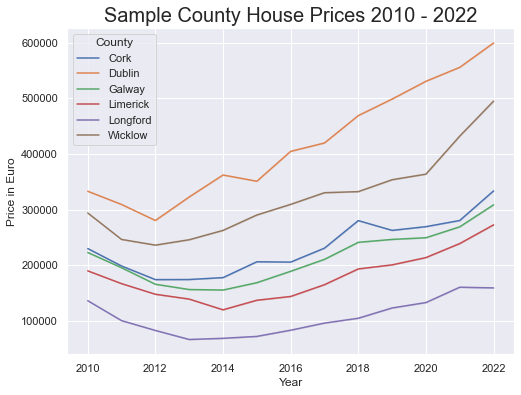

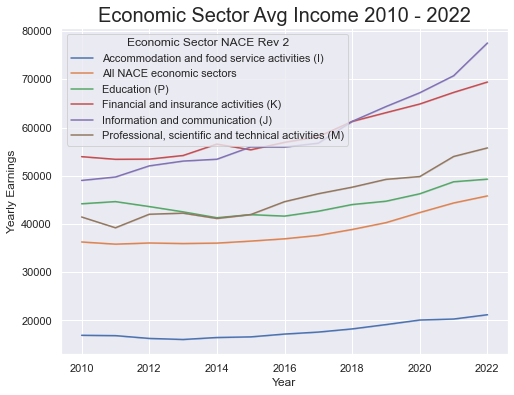

In [252]:
# Bar chart of Dublin House Prices
sns.set(style='darkgrid')
plt.figure(figsize=(8,6))
sns.lineplot(x='Year', 
            y='Price in Euro', 
            data=merged_df1, 
            hue='County'
            ).set_title('Sample County House Prices 2010 - 2022', fontdict={'size': 20})


# Line Chart of Sectors sampled
sns.set(style = 'darkgrid')
plt.figure(figsize=(8,6))
sns.lineplot(x='Year',
            y='Yearly Earnings',
            hue='Economic Sector NACE Rev 2',
            data=merged_df1
            ).set_title('Economic Sector Avg Income 2010 - 2022', fontdict={'size': 20})

In [266]:
# Filter merged df to only have county house prices
Dublin_Price = merged_df1[merged_df1['County'] == 'Dublin']
Cork_Price = merged_df1[merged_df1['County'] == 'Cork']
Longford_Price = merged_df1[merged_df1['County'] == 'Longford']
Galway_Price = merged_df1[merged_df1['County'] == 'Galway']
Wicklow_Price = merged_df1[merged_df1['County'] == 'Wicklow']
Limerick_Price = merged_df1[merged_df1['County'] == 'Limerick']

# Make a list to store these filtered dfs for house prices
#Prices = [Dublin_Price, Cork_Price, Longford_Price, Galway_Price, Wicklow_Price, Limerick_Price]

# Filter the merged df for each sector
IT_sector = merged_df1[merged_df1['Economic Sector NACE Rev 2'] == 'Information and communication (J)']
Finance_sector = merged_df1[merged_df1['Economic Sector NACE Rev 2'] == 'Financial and insurance activities (K)']
STEM_sector = merged_df1[merged_df1['Economic Sector NACE Rev 2'] == 'Professional, scientific and technical activities (M)']
ACC_sector = merged_df1[merged_df1['Economic Sector NACE Rev 2'] ==  'Accommodation and food service activities (I)']
ALL_NACE_sectors = merged_df1[merged_df1['Economic Sector NACE Rev 2'] ==  'All NACE economic sectors']
EDU_sectors = merged_df1[merged_df1['Economic Sector NACE Rev 2'] ==  'Education (P)']

# Make a second list to store the filtered dfs for sector earnigns
#Sectors = [IT_sector, Finance_sector, STEM_sector, ACC_sector, ALL_NACE_sectors, EDU_sectors]

# Create a user-defined function for ease of use. 
# Documentation found at https://www.delftstack.com/howto/python/calculate-slope-python/

def compute_slope(df, x_col, y_col):
    x = df[x_col]
    y = df[y_col]
    slope, intercept = np.polyfit(x, y, 1)
    return slope

# Could not figure out how to iterate over a list of dataframes, instead did it manually. 

# Compute slopes for earnings
IT_slope = compute_slope(IT_sector, 'Year', 'Yearly Earnings')
FI_slope = compute_slope(Finance_sector, 'Year', 'Yearly Earnings')
ST_slope = compute_slope(STEM_sector, 'Year', 'Yearly Earnings')
AC_slope = compute_slope(ACC_sector, 'Year', 'Yearly Earnings')
ALL_slope = compute_slope(ALL_NACE_sectors, 'Year', 'Yearly Earnings')
EDU_slope = compute_slope(EDU_sectors, 'Year', 'Yearly Earnings')
DUB_slope = compute_slope(Dublin_Price, 'Year', 'Price in Euro')
CORK_slope = compute_slope(Cork_Price, 'Year', 'Price in Euro')
LONGF_slope = compute_slope(Longford_Price, 'Year', 'Price in Euro')
GAL_slope = compute_slope(Galway_Price, 'Year', 'Price in Euro')
WICK_slope = compute_slope(Wicklow_Price, 'Year', 'Price in Euro')
LIM_slope = compute_slope(Limerick_Price, 'Year', 'Price in Euro')

# Compute slopes for house prices
DUB_slope = compute_slope(Dublin_Price, 'Year', 'Price in Euro')
CORK_slope = compute_slope(Cork_Price, 'Year', 'Price in Euro')
LONGF_slope = compute_slope(Longford_Price, 'Year', 'Price in Euro')
GAL_slope = compute_slope(Galway_Price, 'Year', 'Price in Euro')
WICK_slope = compute_slope(Wicklow_Price, 'Year', 'Price in Euro')
LIME_slope = compute_slope(Limerick_Price, 'Year', 'Price in Euro')

# Print results
print('The slope of the All NACE economic sectors line is ' + str(ALL_slope))
print('The slope of the Information and communication (J) line is ' + str(IT_slope))
print('The slope of the Financial and insurance activities (K) line is ' + str(FI_slope))
print('The slope of the Professional, scientific and technical activities (M) line is ' + str(ST_slope))
print('The slope of the Accommodation and food service activities (I) line is ' + str(AC_slope))


print('The slope of the Education (P) line is ' + str(EDU_slope))
print('\n')
print('The above slopes can be considered the rate of change in the earnings for Irish workers wages over 2010 - 2022, how does this comapare against the house prices rate of change across Ireland')
print('\n')

print('The slope of the Dublin House price line is ' + str(DUB_slope))
print('The slope of the Cork House price line is ' + str(CORK_slope))
print('The slope of the Longford House price line is ' + str(LONGF_slope))
print('The slope of the Galway House price line is ' + str(GAL_slope))
print('The slope of the Wicklow House price line is ' + str(WICK_slope))
print('The slope of the Limerick House price line is ' + str(LIM_slope)) 



The slope of the All NACE economic sectors line is 796.9542857142621
The slope of the Information and communication (J) line is 2126.13214285709
The slope of the Financial and insurance activities (K) line is 1355.1014285713927
The slope of the Professional, scientific and technical activities (M) line is 1260.380714285675
The slope of the Accommodation and food service activities (I) line is 394.8864285714164
The slope of the Education (P) line is 409.53285714284357


The above slopes can be considered the rate of change in the earnings for Irish workers wages over 2010 - 2022, how does this comapare against the house prices rate of change across Ireland


The slope of the Dublin House price line is 25487.56940431429
The slope of the Cork House price line is 10463.482036809117
The slope of the Longford House price line is 4967.512907285454
The slope of the Galway House price line is 9330.437763060181
The slope of the Wicklow House price line is 17281.33231324594
The slope of the Limer

It's clear from our analysis thus far that the rate of change in the price of houses in Ireland has far outstripped the rise of wages during the same period. 

While there has been increases in average wages such as in the IT/Communications sector (58% total increase) over 2010 - 2022 the price of houses has increased at a much steeper pace; for example, Dublin house prices have increased by 79% over the same period, almost doubling in value. 

While both these percentage increases appear to be high, the actual increase in the cost of a house in Ireland is far larger in monetary value than the increase in wages. 

This data provides insight into the challenges Irish workers are facing today, in counties like Dublin the rapdily increasing cost of housing is outpacing the growth in wages. This makes affording a house or apartment extremely difficult in Dublin, particularly in a city where the cost of living is already considered to be quite high. 

While we have gotten insights from this data, it is important to consider how we can apply this data to a business setting. There is various considerations we may take. 

1. Companies can look at this data and see that their employees may value tele-working, if the office is based in Dublin where house prices are at thier steepest, offering tele-working enables their employees to purchase a home in cheaper counties. This may make the company a more prospective place to work. 

2. The government can evaluate this data to evalaute the ongoing housing crisis in Ireland. This data shows that the cost of buying a house in Ireland has increased at a far steeper pace than that of the average wage in Ireland. If this data is taken alongside figures for population, number of houses/apartments/duplexes being built it can provide a clearer picture of the issues with supply and demand in Irish housing. Such info can be used when creating new policies or shemes like Help to Buy for first time property purchasers. 

3. Banks can look at this data when considering a mortgage application i.e. workers from which sectors are more likely to be able to apply for mortgages in which counties. 

4. Real estate developers can look at this data when considering new builds; building in Dublin for example may lead to a larger profit than other counties. 
 
5. Individuals considering moving to Ireland can look at this data to help inform them where they would want to live, work, or study. 

6. Property Investment groups such as REITs may use this data when considering property to purchase and rent out. 